In [102]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Behavior of labels

## Summary of findings

 * Overall, we do not see strong correlations between labels in each of the three datasets. That is a good sign that labels are not ambiguous and are in fact distinct.
    * **Correlations between frames are capped between -0.3 and 0.3**
 * All labels are present in all three datasets
 * The frequencies are a bit varied across languages, there is not a clear prevalent label across the three languages.
    * English has more documents with the political, crime_and_punishment frames.
    * Russian actually does not have that many documents in the political frame
    * Morality, Crime and punishment, legality_constitutionality_and_jurisprudence are much more prevalent in the english dataset than in the russian and italian datsets.
    * Many documents (>35%) in all three languages are in the security_and_defense frame
    * The frames public_opinion and cultural_identity have a low prevalence in all three languages (~10%)
    * Lowest relative frequency is around (~5%) and highest is around (50%)
 * Number of labels per document also has a different behaviour per dataset. Each one has a different skew and spread. Russian is skewed towards 1-3 frames, english 3-4, and italian 2-5


## Relative frequency of labels?
### How does it change by language?

In [16]:
input_data_dir = os.path.join('..', '..', 'data', 'preprocessed')
en_df = pd.read_csv(os.path.join(input_data_dir, 'input_en_train.csv'), index_col = 'id')
ru_df = pd.read_csv(os.path.join(input_data_dir, 'input_ru_train.csv'), index_col = 'id')
it_df = pd.read_csv(os.path.join(input_data_dir, 'input_it_train.csv'), index_col = 'id')

#### Let's check what are the frames labeled

In [38]:
label_vectorizer = CountVectorizer(tokenizer= lambda x: x.split(','))

In [43]:
label_vectorizer.fit(en_df.frames)
labels_en = set(label_vectorizer.get_feature_names_out())

label_vectorizer.fit(it_df.frames)
labels_it = set(label_vectorizer.get_feature_names_out())

label_vectorizer.fit(ru_df.frames)
labels_ru = set(label_vectorizer.get_feature_names_out())

/home/juanbermeo/anaconda3/envs/Framing/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [45]:
labels_en == labels_ru == labels_it

True

All labels are present in all three datasets

#### Let's obtain the relative frequencies of each label per language

In [60]:
def count_labels(df):
    label_vectorizer = CountVectorizer(tokenizer= lambda x: x.split(','))
    labels_df = label_vectorizer.fit_transform(df.frames)
    return pd.DataFrame(labels_df.todense(), columns=label_vectorizer.get_feature_names_out(), index=df.index)

In [63]:
labels_en_df = count_labels(en_df)
labels_it_df = count_labels(it_df)
labels_ru_df = count_labels(ru_df)

In [90]:
freq_labels_en = (labels_en_df.sum(axis=0)/labels_en_df.shape[0]).sort_values().rename('en')
freq_labels_it = (labels_it_df.sum(axis=0)/labels_it_df.shape[0]).rename('it')
freq_labels_ru = (labels_ru_df.sum(axis=0)/labels_ru_df.shape[0]).rename('ru')

In [95]:
freq_labels_df = pd.DataFrame(freq_labels_en).join(freq_labels_it).join(freq_labels_ru)

(0.0, 0.7)

<Figure size 1400x500 with 0 Axes>

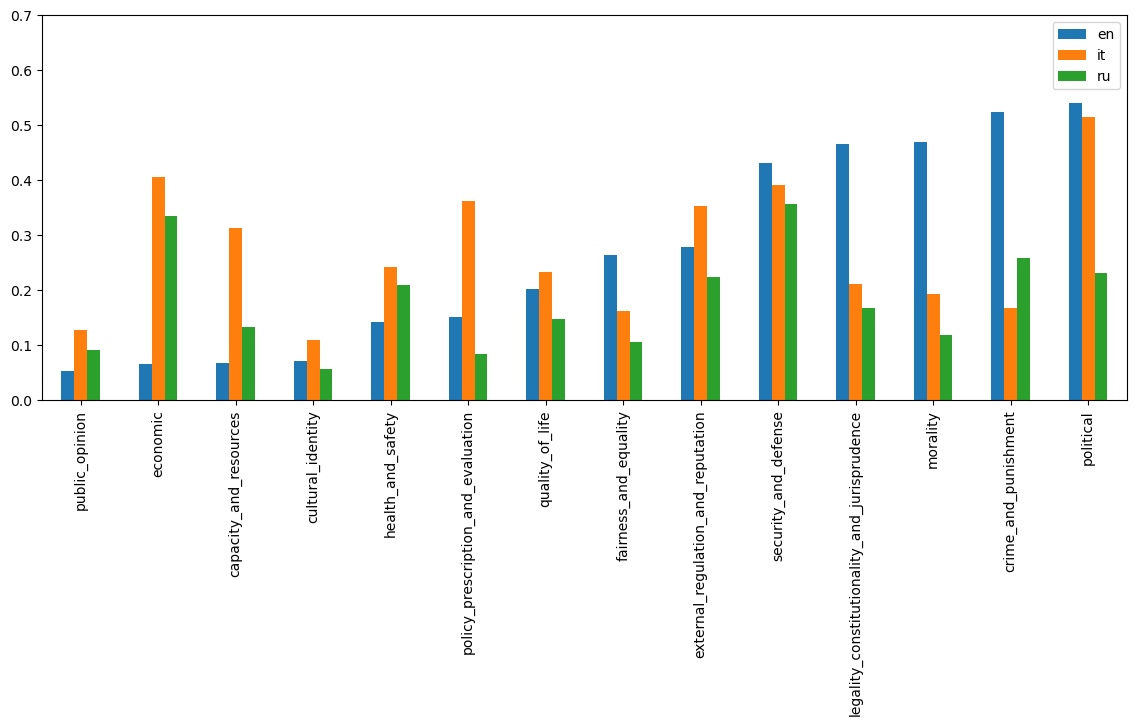

In [98]:
freq_labels_df.plot.bar(figsize=(14,5))
plt.xticks(rotation=90)
plt.ylim(0, 0.7)

The frequencies are a bit varied across languages, but we have the following common patterns:

 - Usually as prevalent classes for all three languages (>35%):
    - security_and_defense

 - Usually as low frequency classes ~10%
    - public_opinion
    - cultural_identity


## Co-occurrence of labels
### How correlated are the labels? How does it change by language?

In [106]:
def plot_correlation(corr_matrix: np.array, figsize=(11, 9)):
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

Overall, we do not see strong correlations between labels in each of the three datasets. That is a good sign that labels are not ambiguous and are in fact distinct. They are all capped between -0.3 and 0.3

#### English

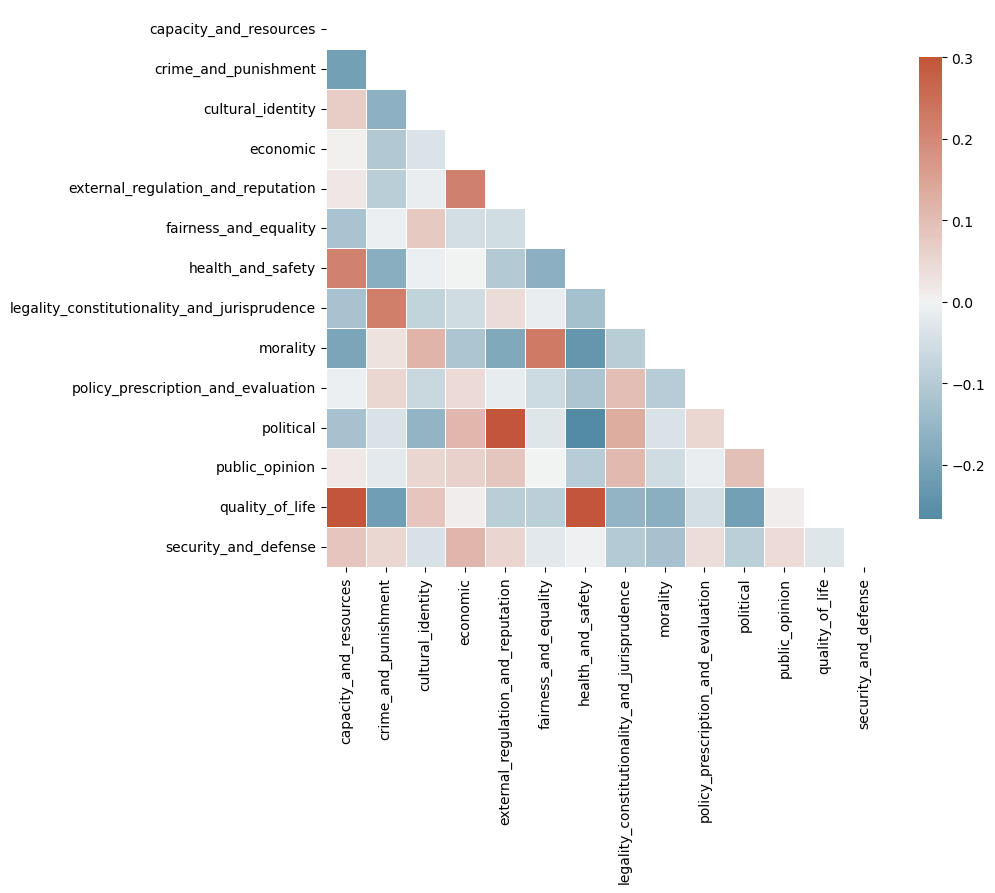

In [114]:
plot_correlation(corr_matrix=labels_en_df.corr(method='spearman'), figsize=(9, 12))

#### Italian

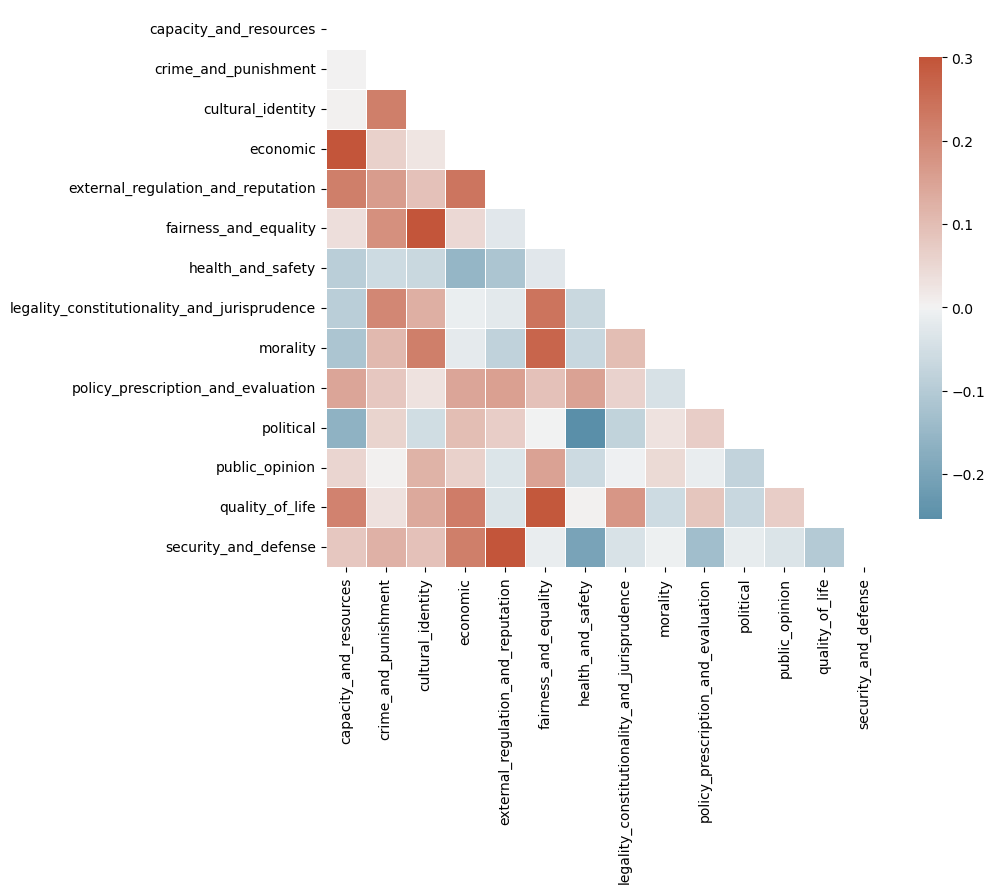

In [115]:
plot_correlation(corr_matrix=labels_it_df.corr(method='spearman'), figsize=(9, 12))

#### Russian

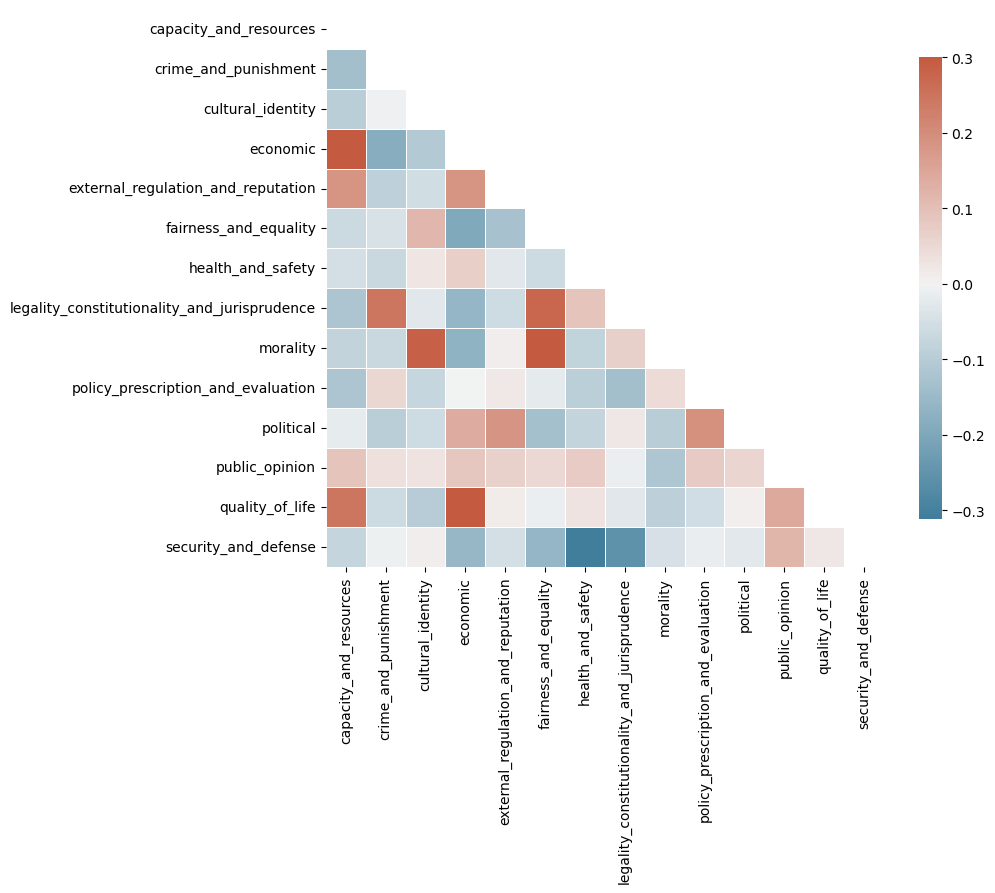

In [116]:
plot_correlation(corr_matrix=labels_ru_df.corr(method='spearman'), figsize=(9, 12))

### Number of labels per document per language?

In [127]:
num_labels_en = labels_en_df.sum(axis=1).rename('en')
num_labels_it = labels_it_df.sum(axis=1).rename('it')
num_labels_ru = labels_ru_df.sum(axis=1).rename('ru')

In [144]:
num_labels_df = pd.DataFrame(num_labels_en.value_counts(normalize=True))\
    .join(num_labels_it.value_counts(normalize=True), how='outer')\
    .join(num_labels_ru.value_counts(normalize=True), how='outer')\
    .fillna(0)

Text(0.5, 0, 'number of frames')

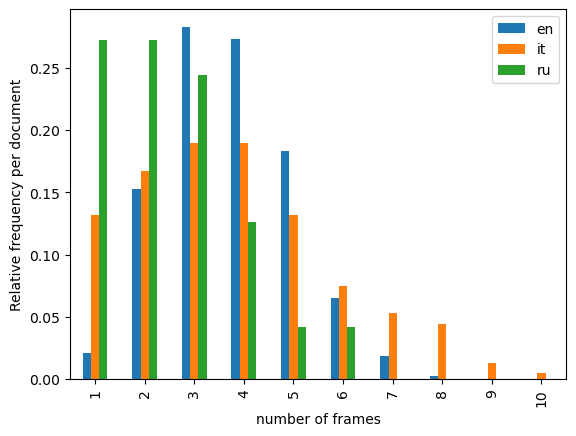

In [148]:
num_labels_df.plot.bar()
plt.ylabel('Relative frequency per document')
plt.xlabel('number of frames')

Each one has a different skew and spread. Russian is skewed towards 1-3 frames, english 3-4, and italian 2-5

## Top 10 tokens per label in english

### Measured by count


### Measured by TF-IDF